In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, cm

# Function definition

In [22]:
H = np.array([[3,0],[0,1]])

In [23]:
def f(z):
    return (z.T).dot(H).dot(z)

def df(z):
    return H.dot(z)

def deltaf(z,u):
    """returns directional derivative of f along u"""
    return (H.dot(z)).dot(u)/np.linalg.norm(u)

# ctrl+/ to comment/uncomment
# def projdf(z,U):
#     """returns directional derivative of f along U
#     U : (d,rank) matrix where each column is a direction"""
#     U_orth,_,_ = np.linalg.svd(U, full_matrices=False)
#     return U_orth.dot(U_orth.T.dot(H.dot(z)))

print("f(1,1) = ", f(np.array([1,1])))
print("deltaf((1,1),(0,1)) = ", deltaf(np.array([1,1]), np.array([0,1])))

f(1,1) =  4
deltaf((1,1),(0,1)) =  1.0


# Plotting function

In [24]:
xmin = -2.0
xmax = 2.0
N=100

x1, x2 = np.meshgrid(np.linspace(xmin,xmax, num=N), np.linspace(xmin,xmax, num=N))
coords = np.stack([x1,x2],axis=2)
f_coords = np.apply_along_axis(f,2,coords)

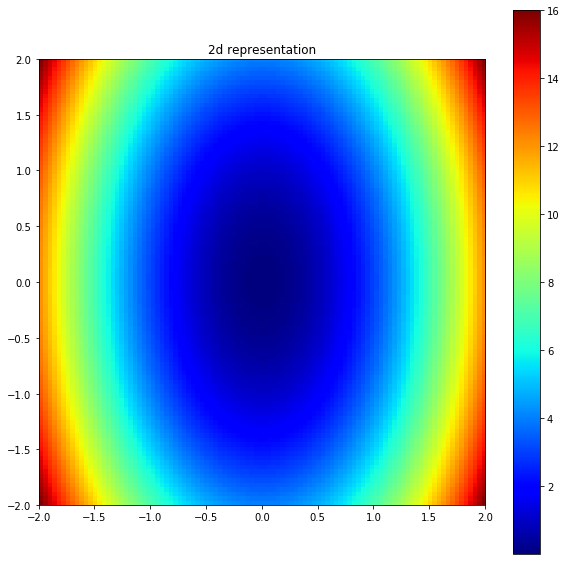

In [25]:
plt.figure(figsize=(10,10))

plt.imshow(f_coords,extent=[xmin,xmax,xmin,xmax], cmap=cm.jet, origin='lower')

plt.colorbar()

plt.title("2d representation")

#plt.savefig("evaluate_2d_function_using_meshgrid_03.png", bbox_inches='tight')

plt.show()

# Classic Gradient Descent

In [26]:
def GD(alpha = 0.1,z0 = np.array([1.5,1.5]), epsilon=0.1):
    Z = [z0]
    G = [df(z0)] 
    C = [0]
    
    while True: 
        zprev = Z[-1]
        gprev = G[-1]
        znext = zprev-alpha*gprev
        Z.append(znext)
        G.append(df(znext))
        C.append(len(z0))
        if np.linalg.norm(G[-1])<epsilon**(1/2):
            #STOPING CONDITION
            #Previous stopping was: f(zprev)-f(znext)<epsilon: 
            break

    return (np.array(Z),C)

ZGD, C = GD(epsilon = 0.4)
print("oracle calls : ", np.sum(C))

oracle calls :  18


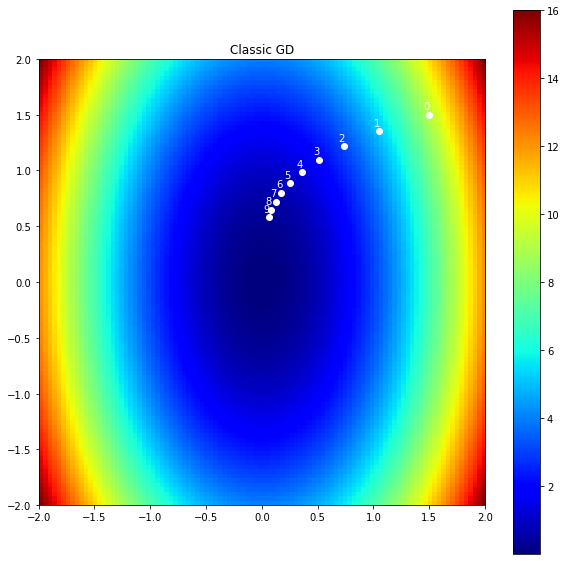

In [27]:
x=ZGD[:,0]
y=ZGD[:,1]
T = len(x)


plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y,color="white")
plt.imshow(f_coords,extent=[xmin,xmax,xmin,xmax], cmap=cm.jet, origin='lower')


for i, txt in enumerate(x):
    plt.annotate(str(i), (x[i]-0.05, y[i]+0.05),color="white",fontsize=10)

plt.colorbar()


plt.title("Classic GD")

#plt.savefig("evaluate_2d_function_using_meshgrid_03.png", bbox_inches='tight')

plt.show()

Text(0.5, 1.0, 'In log scale')

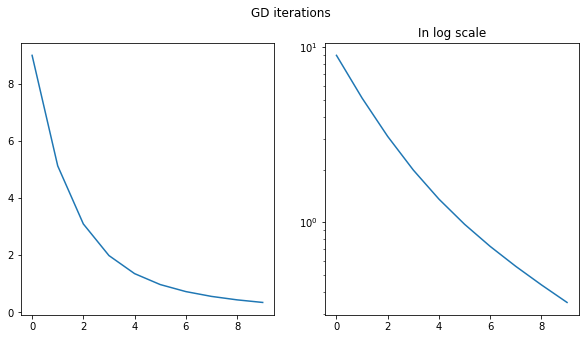

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('GD iterations')

ax1.plot([f(ZGD[i]) for i in range(len(ZGD))])

ax2.set_title("performance")
ax2.plot([f(ZGD[i]) for i in range(len(ZGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")

In [29]:
def LRGD(alpha = 0.1,z0 = np.array([1.5,1.5]), rank=1, epsilon=0.1):
    """a better implementation"""
    Z = [z0] # point
    G = [] # gradient
    C = [0] # oracle cost
    
    def GD_iter():
        #compute
        g = df(Z[-1])
        znext = Z[-1]-alpha*g
        
        #update
        Z.append(znext)
        G.append(g)
        C.append(len(z0))
    
    def LR_iter():
        #print("lr iter : ", len(Z))
        #print("current pos : ", Z[-1])
        
        #compute
        g = deltaf(Z[-1],G[-1])*G[-1]/np.linalg.norm(G[-1])
        #g = df(Z[-1]).dot(G[-1])/np.linalg.norm(G[-1])*G[-1]
        znext = Z[-1]-alpha*g
        
        #update
        Z.append(znext)
        G.append(g)
        C.append(rank)
        #print("next pos : ", Z[-1])
        
        
    GD_iter()
    
    while np.linalg.norm(G[-1]) > epsilon**(1/2): 
        
        LR_iter()
        
        if np.linalg.norm(G[-1]) < epsilon**(1/2): 
        
            GD_iter()
    
    return (np.array(Z),C)

In [30]:
ZLRGD,C = LRGD(epsilon=0.4)
print("oracle calls : ", np.sum(C))

oracle calls :  18


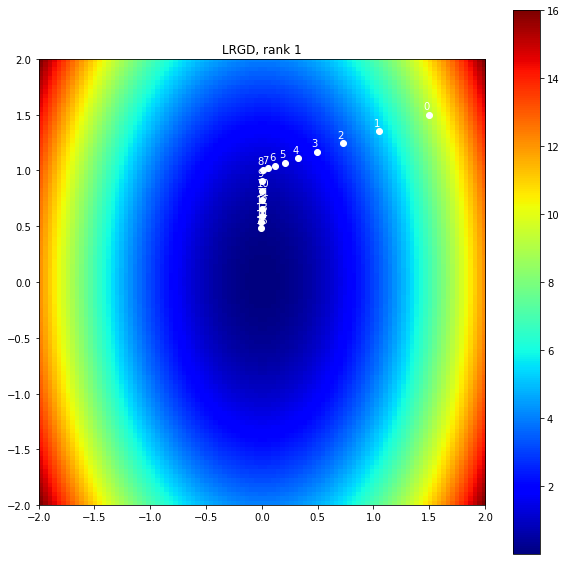

In [31]:
x=ZLRGD[:,0]
y=ZLRGD[:,1]
T = len(x)


plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y,color="white")
plt.imshow(f_coords,extent=[xmin,xmax,xmin,xmax], cmap=cm.jet, origin='lower')


for i, txt in enumerate(x):
    plt.annotate(str(i), (x[i]-0.05, y[i]+0.05),color="white",fontsize=10)

plt.colorbar()


plt.title("LRGD, rank 1")

#plt.savefig("evaluate_2d_function_using_meshgrid_03.png", bbox_inches='tight')

plt.show()

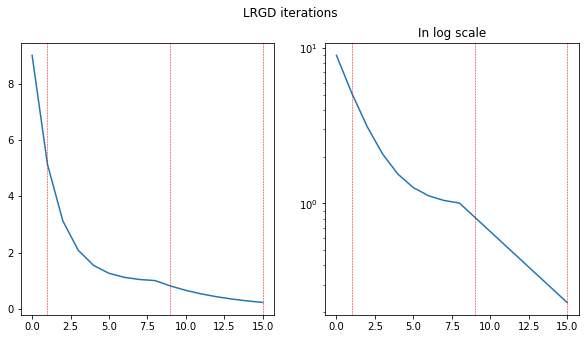

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('LRGD iterations')

ax1.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])

ax2.set_title("performance")
ax2.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")


for i,c in enumerate(C):
    if c==2: 
        ax1.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        ax2.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        

# Higher dimension

In [41]:
H = np.array(
    [[3,0,0,0],
     [0,1,0,0],
     [0,0,0.1,0],
     [0,0,0,0.01]])

In [47]:
ZGD,CGD = GD(z0 = np.array([1,1,1,1]),epsilon=0.001)
print("oracle calls : ", np.sum(CGD))

oracle calls :  476


In [48]:
ZLRGD,CLRGD = LRGD(z0 = np.array([1,1,1,1]),epsilon=0.001)
print("oracle calls : ", np.sum(CLRGD))

oracle calls :  243


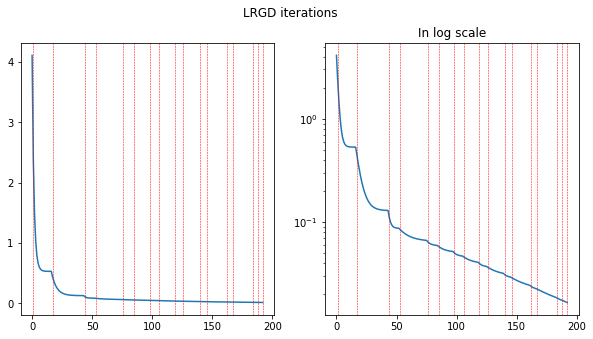

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('LRGD iterations')

ax1.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])

ax2.set_title("performance")
ax2.plot([f(ZLRGD[i]) for i in range(len(ZLRGD))])
ax2.set_yscale("log")
ax2.set_title("In log scale")


for i,c in enumerate(CLRGD):
    if c>1: 
        ax1.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        ax2.axvline(x = i, color = 'r', label = 'axvline - full height', linestyle = "--", linewidth = 0.5)
        

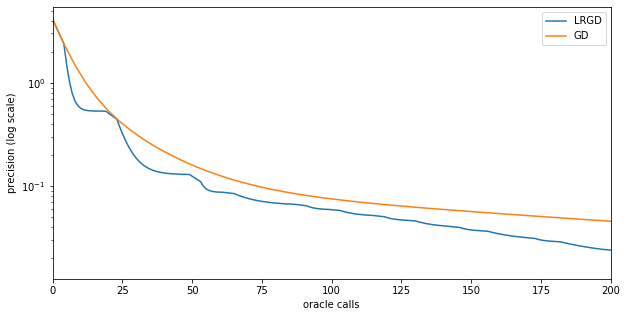

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))

ax.plot(np.cumsum(CLRGD),[f(ZLRGD[i]) for i in range(len(ZLRGD))],label="LRGD")
ax.plot(np.cumsum(CGD),[f(ZGD[i]) for i in range(len(ZGD))],label="GD")
ax.set_yscale("log")
ax.set_ylabel("precision (log scale)")
ax.set_xlabel("oracle calls")
ax.set_xlim(left=0,right=200)
ax.legend()
fig.savefig("GDvsLRGD.png")

# More experiments

In [73]:
H = np.array(
    [[3,0,0,0],
     [0,1,0,0],
     [0,0,10,0],
     [0,0,0,5]])

ZGD,CGD = GD(z0 = np.array([1,1,1,1]),epsilon=0.00000000001)
print("oracle calls GD : ", np.sum(CGD))

ZLRGD,CLRGD = LRGD(z0 = np.array([1,1,1,1]),epsilon=0.00000000001)
print("oracle calls LRGD : ", np.sum(CLRGD))

oracle calls GD :  484
oracle calls LRGD :  824


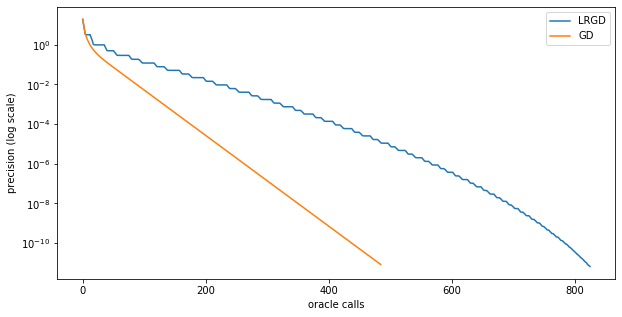

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (10,5))

ax.plot(np.cumsum(CLRGD),[f(ZLRGD[i]) for i in range(len(ZLRGD))],label="LRGD")
ax.plot(np.cumsum(CGD),[f(ZGD[i]) for i in range(len(ZGD))],label="GD")
ax.set_yscale("log")
ax.set_ylabel("precision (log scale)")
ax.set_xlabel("oracle calls")
ax.legend()
fig.savefig("GDvsLRGD.png")

# Higher rank (todo)

In [39]:
ZLRGD,C = GD(z0 = np.array([1,1,1,1]),epsilon=0.001)
np.sum(C)

76

In [40]:
ZLRGD,C = LRGD(z0 = np.array([1,1,1,1]),epsilon=0.001)
np.sum(C)

114